# Online_Retail

## Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

## Step 2. Import the dataset from this address.

## Step 3. Assign it to a variable called online_rt

注意：如果您收到utf-8解码错误，请在 `pd.read_csv()` 中设置 `encoding = 'latin1'`。

In [6]:
path = './Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

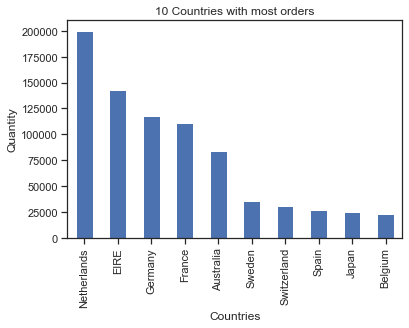

In [7]:
countries = online_rt.groupby('Country').sum()

countries = countries.sort_values(by='Quantity', ascending=False)[1:11]

countries['Quantity'].plot(kind='bar')

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

plt.show()

## Step 5. Exclude negative Quantity entries

In [8]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

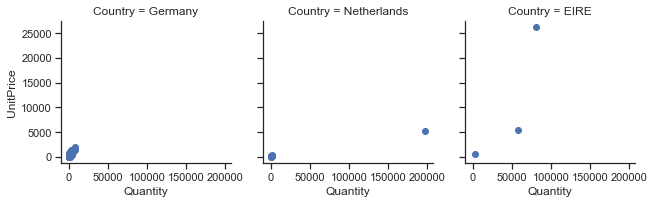

In [9]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum()

customers = customers[customers.UnitPrice>0]

customers['Country'] = customers.index.get_level_values(1)

top_countries = ['Netherlands', 'EIRE', 'Germany']

customers = customers[customers['Country'].isin(top_countries)]

g = sns.FacetGrid(customers, col="Country")

g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

g.add_legend()

## Step 7. Investigate why the previous results look so uninformative.

这一部分可能看起来有点乏味。但我将其视为对处理数据和其他人时可能遇到的问题的某种模拟。此外，最后还有一个奖品（即第8节）。

（但如果您愿意，请随时跳转到第8节；它不需要您完成此部分。）

### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.

#### Step 7.1.1 Display the first few rows of that DataFrame.

In [10]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum().head()
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


#### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [11]:
customers.UnitPrice.dtype

dtype('float64')

#### Step 7.1.3 Pull data from online_rtfor CustomerIDs 12346.0 and 12347.0.

In [13]:
display(online_rt[online_rt.CustomerID == 12347.0].sort_values(by='UnitPrice', ascending=False).head())
display(online_rt[online_rt.CustomerID == 12346.0].sort_values(by='UnitPrice', ascending=False).head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


### Step 7.2 Reinterpreting the initial problem.

重申我们正在处理的问题：为前3个国家创建按客户ID计算的单位数量价格的散点图

这个问题有一系列不同的解释。我们需要消除歧义。

通过查看前3个国家的所有数据，我们可以做一个 plot。或者我们可以每个国家做一个plot。为了让事情与练习的其余部分保持一致，让我们坚持后一种观点。所以就这样解决了。

但“三大国家”在什么方面呢？两个答案表明自己：总销量（即总销量）或总销售额（即收入）。这个练习是为了销售量，所以让我们坚持下去。

#### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [16]:
sales_volume = online_rt.groupby("Country").Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4]
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

#### Step 7.2.2

现在我们有了前3名国家，我们可以专注于其余问题：客户ID的单位价格数量。我们需要 unpack 它。

“by CustomerID” 部分很容易。这意味着我们将在我们的绘图上根据 CustomerID 绘制一个点。换句话说，我们将按 CustomerID 分组。

“Quantity per UnitPrice”更棘手。以下是我们所知道的：一个轴将表示分配给给定客户的数量。这很简单；我们可以为每个客户绘制总数量。另一个轴将表示分配给给定客户的UnitPrice。请记住，单个客户可以拥有任何数量不同价格的订单，因此总结价格没有多大帮助。此外，当我们说“unit price per customer”时，我们的意思还不太清楚；这听起来像 customer 的价格！一个合理的选择是，我们为每个客户分配每个项目支付的平均金额。因此，让我们以这种方式解决这个问题。

### Step 7.3 Modify, select and plot data

#### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.

我们稍后会用它来计算每个客户的平均价格。

In [17]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


#### Step 7.3.2 Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.

In [19]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID', 'Country'])

plottable = grouped['Quantity', 'Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

/var/folders/7q/gtdgjdyn4rn030xffh9zbbrm0000gp/T/ipykernel_35841/1736104900.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity', 'Revenue'].agg('sum')


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


#### Step 7.3.3 Plot

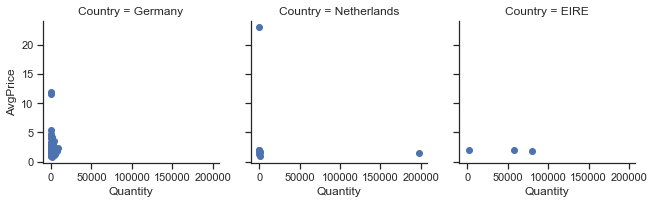

In [20]:
g = sns.FacetGrid(plottable, col="Country")
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
g.add_legend()

### Step 7.4 What to do now?

我们并不比我们开始时好多少。数据仍然非常分散，似乎没有提供很多信息。

但我们不应该绝望！有两件事需要实现：1）数据似乎偏向轴（例如，我们没有任何 Quantity=50000 和 AvgPrice=5 的值）。因此，这可能表明一种趋势。2）我们有更多的数据！我们只查看了来自3个不同国家的数据，它们被绘制在不同的图表上。

因此：无论国家如何，我们都应该绘制数据，并希望看到一个不那么分散的图表。

#### Step 7.4.1 Plot the data for each CustomerID on a single graph

/var/folders/7q/gtdgjdyn4rn030xffh9zbbrm0000gp/T/ipykernel_35841/451668029.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

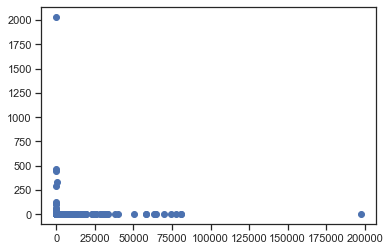

In [21]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()


#### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

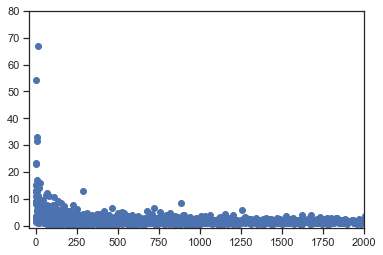

In [22]:
groupped = online_rt.groupby(['CustomerID', 'Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plt.scatter(plottable.Quantity, plottable.AvgPrice)

plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()

## 8. Plot a line chart showing revenue (y) per UnitPrice (x).

第7步是否给了我们任何关于数据的见解？当然！随着平均价格的上涨，订购的数量会下降。但这不足为奇。如果不是这样，那就太令人惊讶了！

然而，数量的下降速度如此剧烈，这让我想知道我们的收入在商品价格方面是如何变化的。如果它没有那么大变化，那就不足为奇了。但想知道我们的大部分收入是来自昂贵的还是便宜的物品，以及这种关系是什么样子的，会很有趣。

### 8.1 Group `UnitPrice` by intervals of 1 for prices \[0,50), and sum `Quantity` and `Revenue`.

In [23]:
price_start = 0
price_end = 50
price_interval = 1

buckets = np.arange(price_start, price_end, price_interval)

revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

### 8.3 plot

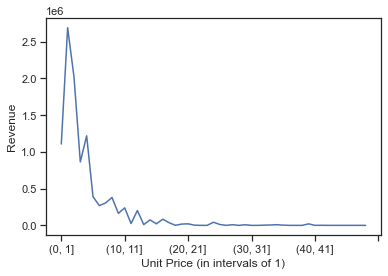

In [25]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

## 8.4 Make it look nicer.

X轴需要值。

Y轴不是那么容易阅读；以数百万表示。

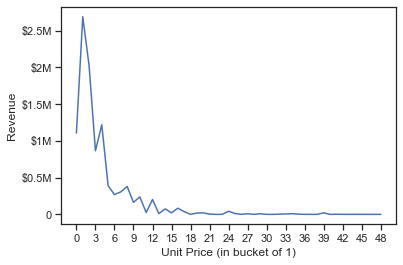

In [26]:
revenue_per_price.plot()

plt.xlabel('Unit Price (in bucket of '+str(price_interval)+')')
plt.ylabel('Revenue')

plt.xticks(np.arange(price_start, price_end, 3),
           np.arange(price_start, price_end, 3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()